In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
x_train=pd.read_csv("PCT\\PCT_train_x.csv")
y_train=pd.read_csv("PCT\\PCT_train_y.csv")
x_test=pd.read_csv("PCT\\PCT_test_x.csv")
y_test=pd.read_csv("PCT\\PCT_test_y.csv")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [27]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])
y_train=y_train.drop(columns=["T_ID", "YEAR"])
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [28]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              59392     
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 3,209,217
Trainable params: 3,209,217
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stop = EarlyStopping(monitor='loss', mode = 'min',patience=2, verbose=1)

history = model.fit(
  x_train, y_train,
  epochs=100, validation_split = 0.2, verbose=1,
  callbacks=[early_stop])

W0927 20:02:36.229572 17536 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 2336 samples, validate on 584 samples
Epoch 1/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 21.1557 - mae: 0.7493 - mse: 21.1557 - val_loss: 0.0364 - val_mae: 0.1600 - val_mse: 0.0364
Epoch 2/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0845 - mae: 0.2296 - mse: 0.0845 - val_loss: 0.1150 - val_mae: 0.3196 - val_mse: 0.1150
Epoch 3/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0447 - mae: 0.1651 - mse: 0.0447 - val_loss: 0.0785 - val_mae: 0.2563 - val_mse: 0.0785
Epoch 4/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0258 - mae: 0.1292 - mse: 0.0258 - val_loss: 0.0163 - val_mae: 0.1035 - val_mse: 0.0163
Epoch 5/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0196 - mae: 0.1132 - mse: 0.0196 - val_loss: 0.0150 - val_mae: 0.0998 - val_mse: 0.0150
Epoch 6/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0189 - mae: 0.1101 - mse:

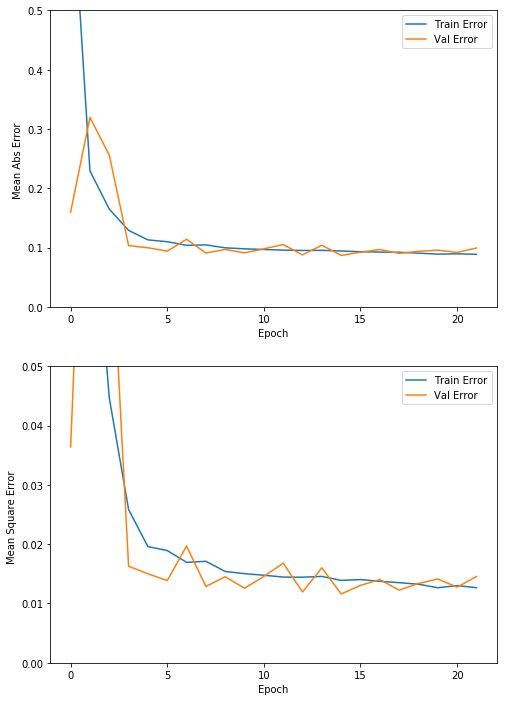

In [30]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error ')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error ')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()

plot_history(history)

In [32]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 mae: {:5.4f} ".format(mae))
print("테스트 세트의 mse: {:5.4f} ".format(mse))

W0927 20:03:55.626240 17536 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


50/50 - 0s - loss: 0.0105 - mae: 0.0845 - mse: 0.0105
테스트 세트의 mae: 0.0845 
테스트 세트의 mse: 0.0105 


In [33]:
y_test=pd.read_csv("PCT\\PCT_test_y.csv")
y_TID=y_test["T_ID"]
y_YEAR=y_test["YEAR"]

In [34]:
pred=model.predict(x_test)
y_test["pred"]=pred
y_test['T_ID']=y_TID
y_test['YEAR']=y_YEAR
y_test=y_test[['YEAR', 'T_ID', 'PCT', 'pred']]

W0927 20:04:26.099167 17536 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


In [35]:
y_test

,YEAR,T_ID,PCT,pred
0,2016,HH,0.500000,0.512821
1,2016,HT,0.458333,0.504201
2,2016,KT,0.291667,0.536024
3,2016,LG,0.608696,0.512514
4,2016,LT,0.500000,0.456743
5,2016,NC,0.565217,0.438713
6,2016,OB,0.666667,0.567430
7,2016,SK,0.458333,0.507579
8,2016,SS,0.500000,0.536289
9,2016,WO,0.375000,0.510387


In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test['PCT'], pred)

In [39]:
mse

0.010461313478639822

In [19]:
len(x_train.keys())

57